# DIPLOMATURA EN CIENCIA DE DATOS, APRENDIZAJE AUTOMÁTICO Y SUS APLICACIONES

## Analisis y visuzlización de datos 

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import time
import datetime as dt
from IPython.display import HTML, display
import math

seaborn.set_context('talk')



In [2]:
url= 'https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/DataSet_Mumuki_New.csv'
df_mumuki = pd.read_csv(url)

In [3]:
df_mumuki[:3]

,Unnamed: 0,exercise_eid,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,...,Date,Periodo,Year,Month,Week,DayNroWeek,DayNameWeek,Time,Hora,Estatus
0,0,1,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\n return numero / 2,2019-08-30 13:17:17.700,...,2019-08-30,2019-08,2019,8,35,4,Friday,13:17:17.700000,13,paso
1,1,1,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\n return numero / 2,2019-09-04 01:29:22.351,...,2019-09-04,2019-09,2019,9,36,2,Wednesday,01:29:22.351000,1,paso
2,2,1,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\n return 2 / numero\n,2019-09-04 02:53:01.099,...,2019-09-04,2019-09,2019,9,36,2,Wednesday,02:53:01.099000,2,no_paso


In [4]:
def display_blox_plots(df, columns , displayGraph ,scale = False   ):

    row_idx = 0
    col_idx = 0 
    
    columns_count = len (columns)
    
    if (columns_count == 1):
        
        fig, axes = plt.subplots(1, 1 , figsize=(18, 10))
        displayGraph.display(df = df, column = columns[0] , ax_x =  axes )    
  
    elif (columns_count == 2):
        
        fig, axes = plt.subplots(1, 2 , figsize=(18, 10))
        for column in columns:
            displayGraph.display(df = df, column = column , ax_x = axes[col_idx] ) 
            col_idx = col_idx + 1
    else:
        # Se debe hacer de manera automatica el calculo de figsize
        fig, axes = plt.subplots(int(math.ceil(len(columns) / 2 )), 2 , figsize=(18, 8 * int(math.ceil(len(columns) / 2 ))))
        
        for column in columns:
            displayGraph.display(df = df, column = column , ax_x = axes[row_idx][col_idx] ) 
            col_idx = col_idx + 1
            if (col_idx == 2):
                col_idx = 0 
                row_idx = row_idx + 1

In [5]:
class CustomPlot:
    scale = 1
    
    def setScale(self, scale):
        self.scale = scale
        
class CustomBoxPlot(CustomPlot):
   
    
    def __init__(self, scale = 1):
        print("Se corre el constructor")
        self.scale = scale
        
    def display(self, column , ax_x, df):
        
        column_max_value = df[column].max()
        if (self.scale == 1):
            seaborn.boxplot(ax = ax_x ,  data=df[column], orient='h')
        else:    
            seaborn.boxplot(ax = ax_x ,  data=df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]  , orient='h')
        
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)


class CustomHistPlot(CustomPlot):
    
    def __init__(self, scale = 1):
        self.scale = scale
        
    def display(self, column, ax_x, df):
        column_max_value = df[column].max()
            
        if (self.scale == 1):
            seaborn.histplot(ax = ax_x , data =  df[column] ) 
        else:    
            seaborn.histplot(ax = ax_x , data= df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]   ) 
         
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)
        

class CustomDistPlot(CustomPlot):
    
    def __init__(self ,plot):
        self.plot = plot 
        
    def display(self, column, ax_x, df):
        column_max_value = df[column].max()
            
        mean_value = df[column].mean()
        median_value = df[column].median()
        std_value = df[column].std()

        
        if (self.scale == 1):
            seaborn.distplot(a = df[column] ,ax = ax_x )
            
        else:    
            seaborn.distplot(a  = df[column]/self.scale if self.scale and column_max_value > self.scale else df[column]    ,ax = ax_x )
        
        self.plot.draw()
        
        ax_x.set_title( f"{column} expresado en {self.scale}" if  self.scale > 1 and column_max_value > self.scale else column)
        ax_x.axvline(mean_value, color='r', linestyle='-')
        ax_x.axvline(median_value, color='g', linestyle='-')

# Frecuencia de acceso a la app

## Cantidad envios por día

Grafico que muestra la candida de envios por dia, donde se visualiza con que frecuencia en el tiempo se realiza los envios.

<AxesSubplot:xlabel='Date', ylabel='Count'>

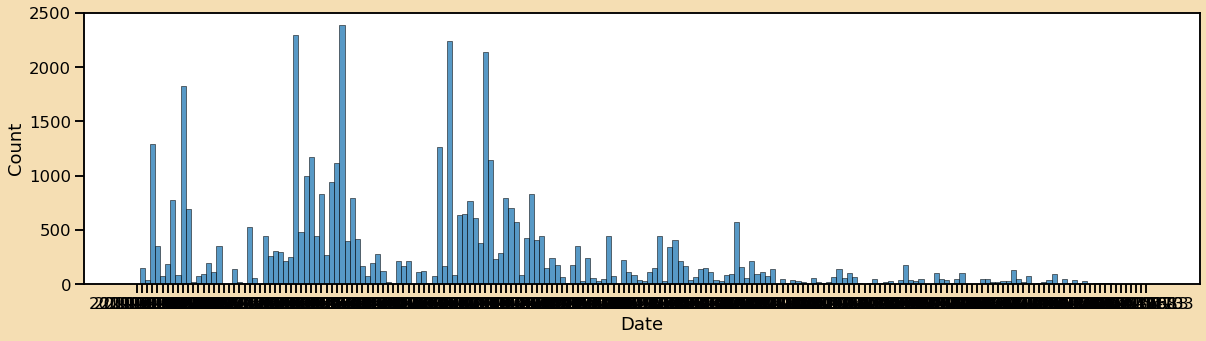

In [30]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
seaborn.histplot(data=df_mumuki.sort_values('Date'), x=df_mumuki['Date'])

**A continuación se agrupa por periodo, donde tenemos la cantidad de envios, la cantidad de ejercicios, la cantidad de estudiante y la cantidad de dias.**

In [7]:
df_Periodo=df_mumuki.groupby(['Year','Month','Periodo'], as_index=False).agg({'exercise_eid':'count','exercise_name': (lambda x: len(set(x))),'student_uid': (lambda x: len(set(x))),'Date': (lambda x: len(set(x)))})

In [8]:
df_Periodo

,Year,Month,Periodo,exercise_eid,exercise_name,student_uid,Date
0,2019,8,2019-08,2,2,1,1
1,2019,9,2019-09,4746,40,54,11
2,2019,10,2019-10,2263,40,45,21
3,2019,11,2019-11,580,40,11,10
4,2019,12,2019-12,23,7,1,1
5,2020,5,2020-05,15732,40,98,27
6,2020,6,2020-06,3507,40,62,30
7,2020,7,2020-07,1126,40,35,19
8,2020,8,2020-08,494,40,5,12
9,2020,9,2020-09,15305,40,94,29


<AxesSubplot:xlabel='Periodo', ylabel='exercise_eid'>

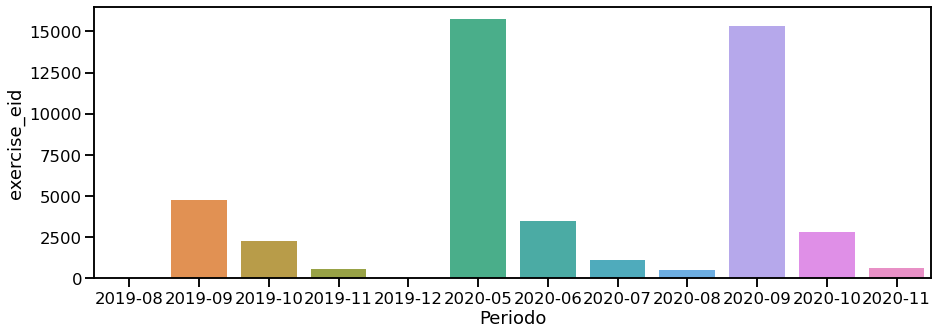

In [9]:
fig, axes = plt.subplots(1, 1 , figsize=(15, 5))
seaborn.barplot(x="Periodo", y="exercise_eid", data=df_Periodo.sort_values('Periodo'))

<AxesSubplot:xlabel='Periodo', ylabel='exercise_name'>

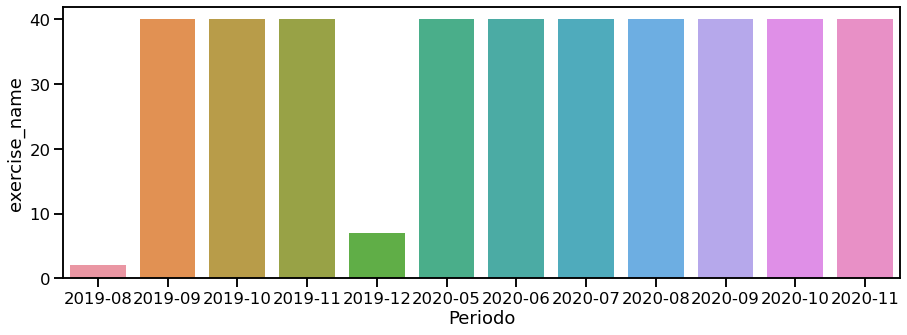

In [10]:
fig, axes = plt.subplots(1, 1 , figsize=(15, 5))
seaborn.barplot(x="Periodo", y="exercise_name", data=df_Periodo.sort_values('Periodo'))

<AxesSubplot:xlabel='Periodo', ylabel='student_uid'>

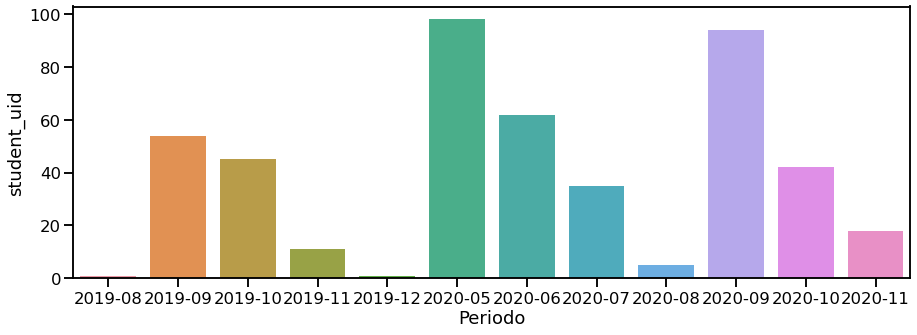

In [11]:
fig, axes = plt.subplots(1, 1 , figsize=(15, 5))
seaborn.barplot(x="Periodo", y="student_uid", data=df_Periodo.sort_values('Periodo'))

**A continuacion se agrupo por año-semana, donde tenemos la cantidad de envios, de ejercicios, de estudiantes y de dias por semana.**

In [12]:
df_week=df_mumuki.groupby(['Year','Week'], as_index=False).agg({'exercise_eid':'count','exercise_name': (lambda x: len(set(x))),'student_uid': (lambda x: len(set(x))),'Date': (lambda x: len(set(x)))})

In [13]:
df_week

,Year,Week,exercise_eid,exercise_name,student_uid,Date
0,2019,35,2,2,1,1
1,2019,36,218,27,3,3
2,2019,37,14,5,1,1
3,2019,39,4166,40,50,6
4,2019,40,1223,40,25,6
5,2019,41,280,33,7,3
6,2019,42,703,40,18,4
7,2019,43,373,40,11,5
8,2019,44,37,14,7,5
9,2019,45,376,40,7,5


**A continuacion se agrupa por estudiante, se contabiliza la cantidad de envios, de ejericios y de dias por estudiante.** 

In [14]:
df_student = df_mumuki.groupby(['student_uid'], as_index=False).agg({'exercise_eid':'count','exercise_name': (lambda x: len(set(x))),'Date': (lambda x: len(set(x)))})

In [15]:
df_student.sort_values(by=['exercise_name'],ascending = True)

,student_uid,exercise_eid,exercise_name,Date
1,75,1,1,1
283,361,1,1,1
177,251,5,1,1
284,362,3,1,1
69,143,3,1,1
...,...,...,...,...
62,136,278,40,3
59,133,191,40,6
55,129,102,40,3
139,213,201,40,4


In [23]:
df_student.describe()

,student_uid,exercise_eid,exercise_name,Date
count,286.000000,286.000000,286.000000,286.000000
mean,216.304196,164.975524,31.150350,4.188811
std,83.389648,108.342000,13.386893,2.515778
min,-1.000000,1.000000,1.000000,1.000000
25%,145.250000,85.250000,22.250000,2.000000
50%,216.500000,148.500000,40.000000,4.000000
75%,287.750000,222.750000,40.000000,6.000000
max,363.000000,660.000000,40.000000,15.000000


<AxesSubplot:xlabel='exercise_name', ylabel='Count'>

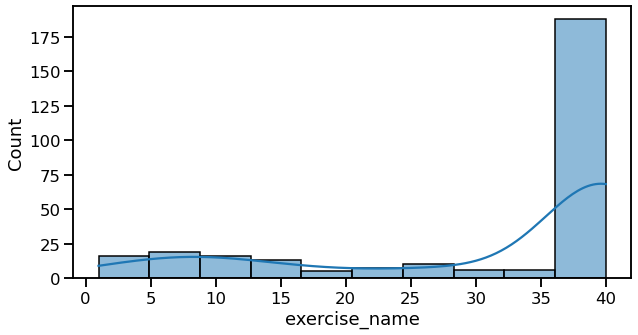

In [17]:
plt.figure(figsize=(10, 5))
seaborn.histplot(df_student['exercise_name'] , kde=True)

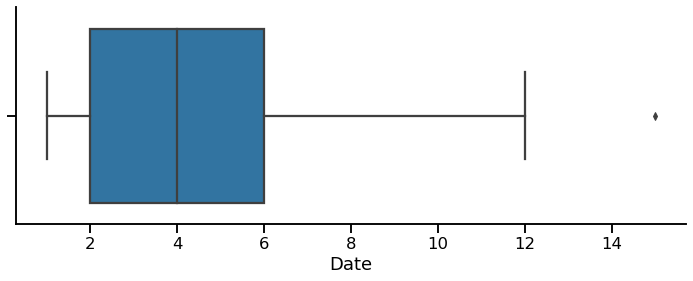

In [18]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_student['Date'])
seaborn.despine()

<AxesSubplot:xlabel='Date', ylabel='Count'>

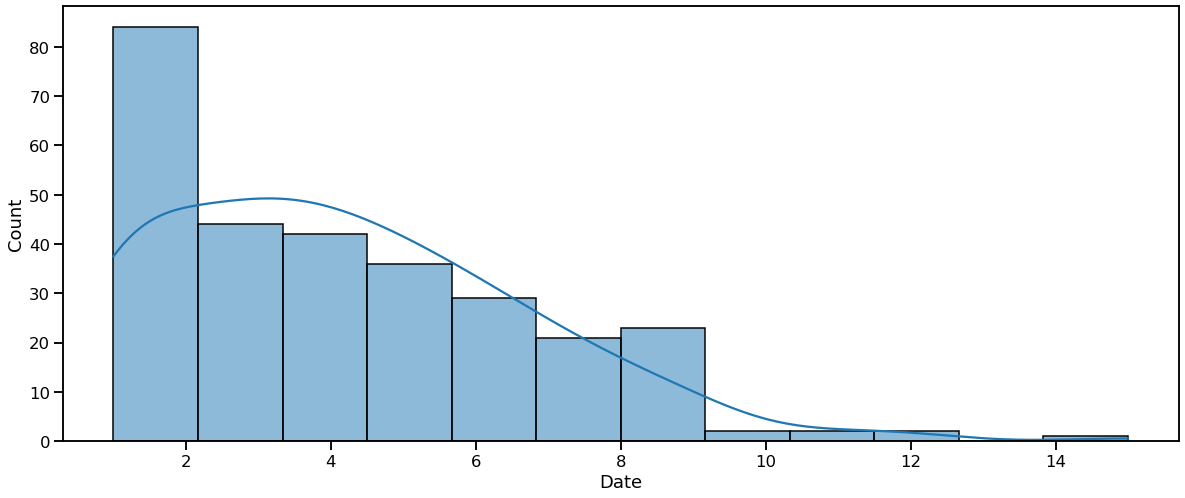

In [19]:
plt.figure(figsize=(20, 8))
seaborn.histplot(df_student['Date'] , kde=True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

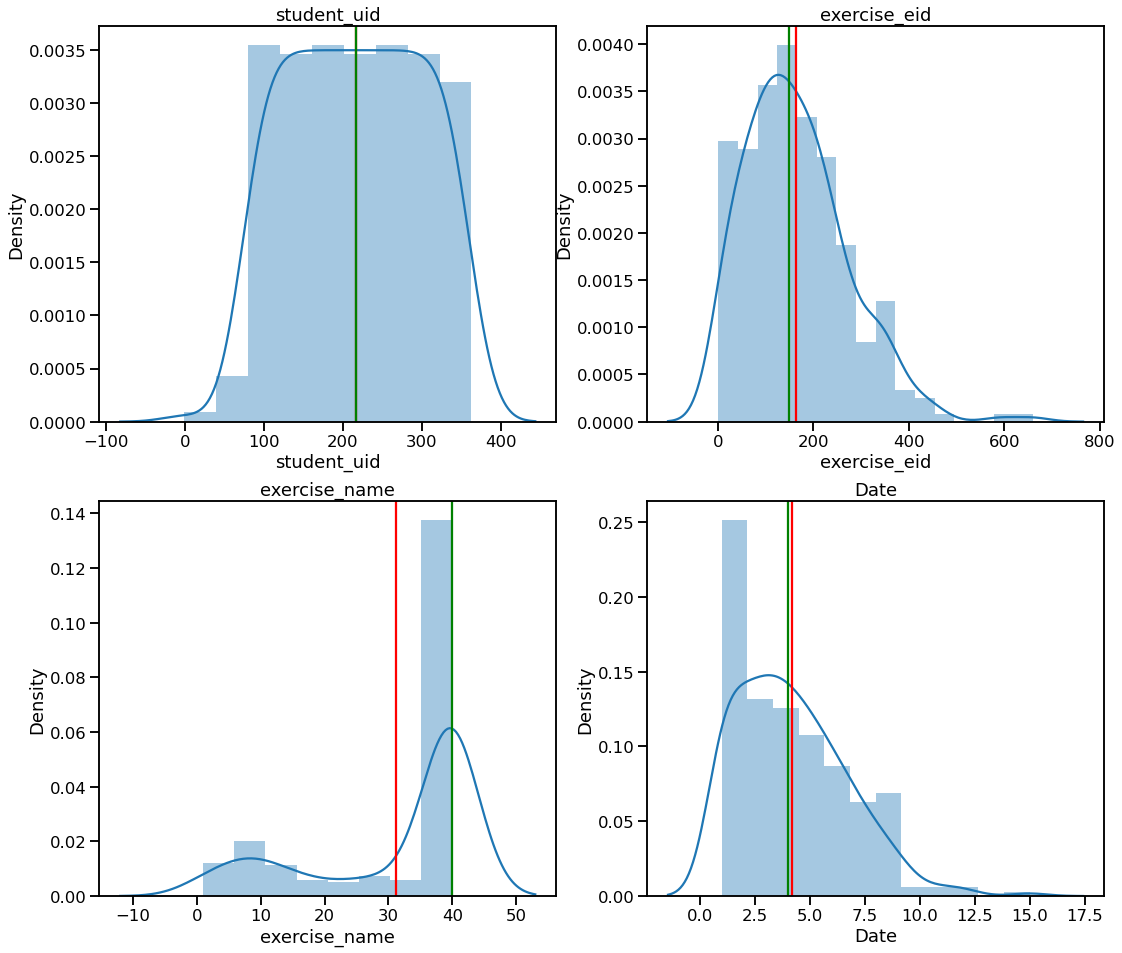

In [21]:
customDistPlot = CustomDistPlot(plt)
customDistPlot.setScale(1)
columns_to_plot = df_student.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = df_student , columns= columns_to_plot , displayGraph= customDistPlot)

**A continuación se determina el Tiempo entre un ejercico.**

In [25]:
df_order=df_mumuki[['student_uid','guide_slug', 'exercise_name', 'Estatus','submission_created_at']].sort_values(by=['student_uid','submission_created_at'],ascending = True)

In [26]:
df_order['prev_value'] = df_order['submission_created_at'].shift().where(df_order.student_uid.eq(df_order.student_uid.shift()))

In [27]:
df_order[:]

,student_uid,guide_slug,exercise_name,Estatus,submission_created_at,prev_value
22309,-1,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",no_paso,2020-07-15 16:19:06.872,NaN
22310,-1,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",no_paso,2020-07-15 16:19:41.159,2020-07-15 16:19:06.872
22311,-1,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",no_paso,2020-07-15 16:19:44.444,2020-07-15 16:19:41.159
22312,-1,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",no_paso,2020-07-15 16:19:47.470,2020-07-15 16:19:44.444
22313,-1,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",no_paso,2020-07-15 16:19:49.408,2020-07-15 16:19:47.470
...,...,...,...,...,...,...
33972,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:08.643,2020-10-06 14:44:05.235
33973,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:27.866,2020-10-06 14:45:08.643
33974,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:35.999,2020-10-06 14:45:27.866
33975,363,mumukiproject/mumuki-guia-python-practica-func...,Cartelitos óptimos,no_paso,2020-10-06 14:45:54.872,2020-10-06 14:45:35.999


In [28]:
df_order['differ'] = (pd.to_datetime(df_order['submission_created_at'])-pd.to_datetime(df_order['prev_value'])).dt.days

In [29]:
df_order.sort_values(by=['differ'],ascending = False)

,student_uid,guide_slug,exercise_name,Estatus,submission_created_at,prev_value,differ
5001,97,mumukiproject/mumuki-guia-python-funciones-tip...,Tipos de datos / Datos de todo tipo,paso,2020-09-18 20:04:05.989,2019-10-23 11:49:33.276,331.0
22308,250,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",paso,2020-10-12 17:17:17.822,2020-07-21 14:40:41.377,83.0
45298,355,mumukiproject/mumuki-guia-python-variables-y-p...,Conversiones,no_paso,2020-08-03 19:40:07.416,2020-05-26 14:44:42.028,69.0
22335,260,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",paso,2020-11-23 20:15:28.657,2020-09-19 17:00:28.418,65.0
2139,319,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, uso",no_paso,2020-11-16 03:31:16.822,2020-09-23 00:31:53.947,54.0
...,...,...,...,...,...,...,...
16903,358,mumukiproject/mumuki-guia-python-funciones-tip...,Operando strings,no_paso,2020-05-16 18:49:13.480,NaN,NaN
22173,359,mumukiproject/mumuki-guia-python-funciones-tip...,"Funciones, declaración / No tan distintos",paso,2020-05-14 22:42:31.975,NaN,NaN
25026,361,mumukiproject/mumuki-guia-python-practica-func...,¿Me conviene?,no_paso,2019-10-17 12:52:42.552,NaN,NaN
26904,362,mumukiproject/mumuki-guia-python-practica-func...,Triangulos,no_paso,2019-10-17 14:35:27.705,NaN,NaN


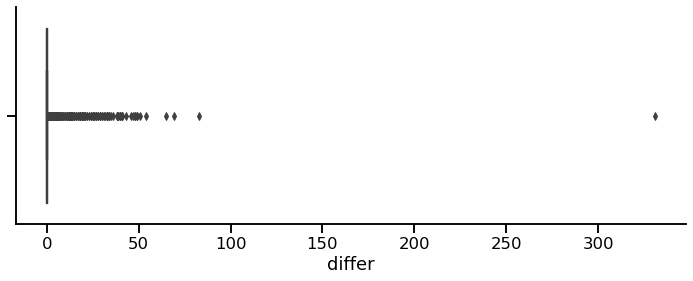

In [31]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_order['differ'])
seaborn.despine()

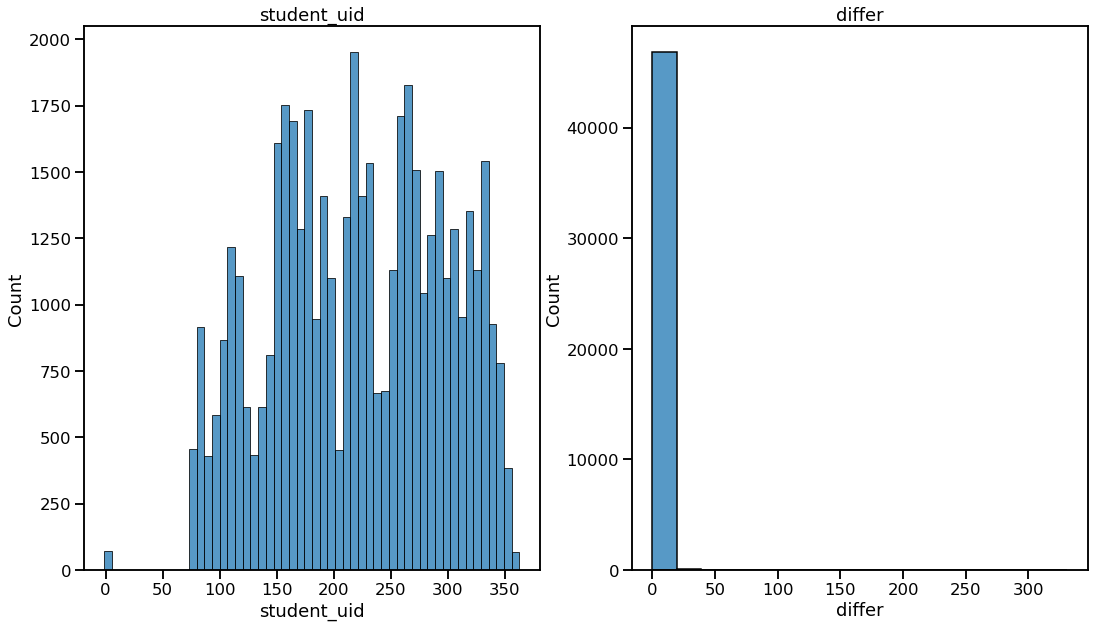

In [33]:
#customHistPlot = CustomHistPlot(1000)

columns_to_plot = df_order.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = df_order , columns= columns_to_plot , displayGraph= customHistPlot)

**A continuacion se detecta el Tiempo entre ejercicio y ejercicio por estudiante (se toma el ultimo envio por estudiante, ejercicio)**

In [34]:
df_byExercise = df_mumuki.groupby(['student_uid','exercise_name'], as_index=False).agg({'submission_created_at':'max','exercise_eid':'count'}).sort_values(by=['student_uid','submission_created_at'],ascending = True)

In [35]:
df_byExercise

,student_uid,exercise_name,submission_created_at,exercise_eid
8,-1,"Funciones, declaración / No tan distintos",2020-07-15 16:22:00.640,11
9,-1,"Funciones, uso",2020-07-15 16:25:48.109,2
16,-1,Probando funciones,2020-07-15 16:36:14.413,3
10,-1,Haciendo cuentas,2020-07-15 16:38:41.638,7
11,-1,Libros de la buena memoria,2020-07-15 16:49:36.204,3
...,...,...,...,...
8904,361,¿Me conviene?,2019-10-17 12:52:42.552,1
8905,362,Triangulos,2019-10-17 14:36:54.224,3
8906,363,Cartelitos,2020-10-06 14:17:51.060,3
8908,363,Más Cartelitos,2020-10-06 14:27:26.752,4


In [36]:
df_byExercise['prev_value_E'] = df_byExercise['submission_created_at'].shift().where(df_byExercise.student_uid.eq(df_byExercise.student_uid.shift()))

In [37]:
df_byExercise

,student_uid,exercise_name,submission_created_at,exercise_eid,prev_value_E
8,-1,"Funciones, declaración / No tan distintos",2020-07-15 16:22:00.640,11,NaN
9,-1,"Funciones, uso",2020-07-15 16:25:48.109,2,2020-07-15 16:22:00.640
16,-1,Probando funciones,2020-07-15 16:36:14.413,3,2020-07-15 16:25:48.109
10,-1,Haciendo cuentas,2020-07-15 16:38:41.638,7,2020-07-15 16:36:14.413
11,-1,Libros de la buena memoria,2020-07-15 16:49:36.204,3,2020-07-15 16:38:41.638
...,...,...,...,...,...
8904,361,¿Me conviene?,2019-10-17 12:52:42.552,1,NaN
8905,362,Triangulos,2019-10-17 14:36:54.224,3,NaN
8906,363,Cartelitos,2020-10-06 14:17:51.060,3,NaN
8908,363,Más Cartelitos,2020-10-06 14:27:26.752,4,2020-10-06 14:17:51.060


In [38]:
df_byExercise['differ_E'] = (pd.to_datetime(df_byExercise['submission_created_at'])-pd.to_datetime(df_byExercise['prev_value_E'])).dt.days

In [39]:
df_byExercise.sort_values(by=['differ_E'],ascending = False)

,student_uid,exercise_name,submission_created_at,exercise_eid,prev_value_E,differ_E
416,97,Tipos de datos / Datos de todo tipo,2020-09-18 20:05:03.146,11,2019-10-23 11:49:33.276,331.0
5173,250,"Funciones, declaración / No tan distintos",2020-10-12 17:17:17.822,6,2020-07-21 14:40:41.377,83.0
8883,355,Conversiones,2020-08-03 19:40:07.416,1,2020-05-26 14:44:42.028,69.0
5532,260,"Funciones, declaración / No tan distintos",2020-11-23 20:15:28.657,4,2020-09-19 17:00:28.418,65.0
7799,319,"Funciones, uso",2020-11-21 15:17:26.661,35,2020-09-23 00:31:53.947,59.0
...,...,...,...,...,...,...
8887,358,Operando strings,2020-05-16 18:50:49.407,6,NaN,NaN
8893,359,"Funciones, declaración / No tan distintos",2020-05-14 22:42:31.975,1,NaN,NaN
8904,361,¿Me conviene?,2019-10-17 12:52:42.552,1,NaN,NaN
8905,362,Triangulos,2019-10-17 14:36:54.224,3,NaN,NaN


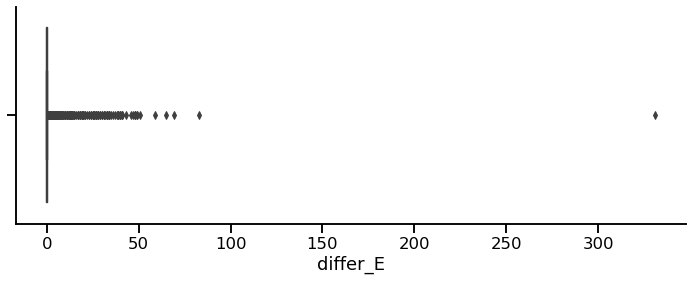

In [40]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_byExercise['differ_E'])
seaborn.despine()

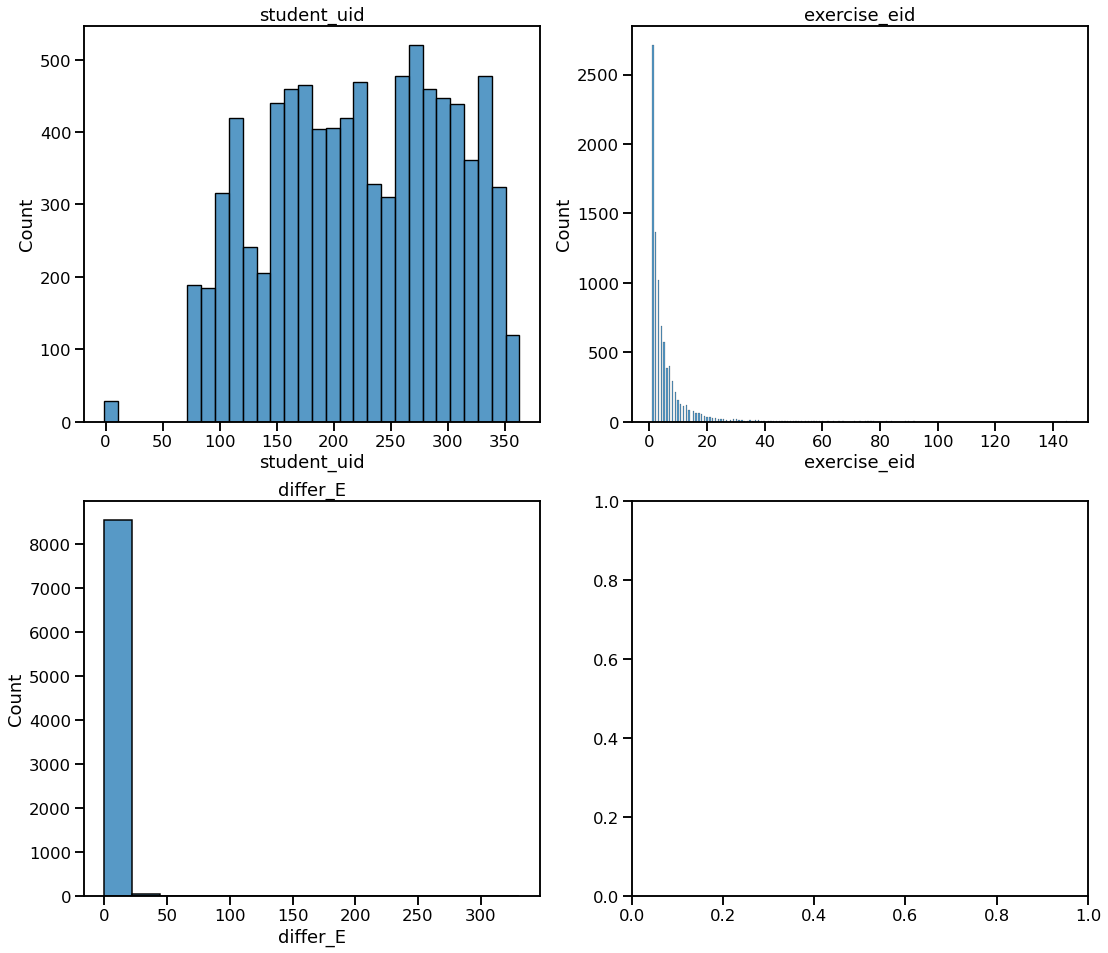

In [42]:
#customHistPlot = CustomHistPlot(1000)

columns_to_plot = df_byExercise.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(df = df_byExercise , columns= columns_to_plot , displayGraph= customHistPlot)